In [5]:
import pandas as pd

single_end_p_value=pd.read_csv('../tumor_only.var.test.result.with.sepval',header=0,sep='\t')
single_end_p_value

,chrom,start,end,observed.mean,observed.var,prior.var,fold.change,pval,padj,y
0,chr1,78727,79971,2.289516,2.585343,1.691094,1.528799,0.447584,0.843741,0.223792
1,chr1,234816,236528,5.450592,0.447079,0.283748,1.575619,0.413888,0.828722,0.206944
2,chr1,236528,237947,4.515310,0.382788,0.445343,0.859534,0.681707,0.927210,0.659147
3,chr1,539664,541178,3.831053,0.761994,0.650911,1.170657,0.815222,0.962742,0.407611
4,chr1,668493,670099,2.745196,1.730730,1.261963,1.371459,0.583026,0.895743,0.291513
5,chr1,672229,673431,2.631224,1.582641,1.356937,1.166333,0.821042,0.964042,0.410521
6,chr1,712319,714938,7.228290,0.233660,0.158273,1.476311,0.488774,0.860960,0.244387
7,chr1,714938,715997,3.941303,0.898716,0.610866,1.471217,0.492974,0.862712,0.246487
8,chr1,750443,751744,2.714704,0.851050,1.286641,0.661451,0.324906,0.785177,0.837547
9,chr1,751744,753744,5.903339,0.625434,0.236036,2.649738,0.079484,0.592758,0.039742


In [6]:
#difine hyper-variable bins
p_val_threshold=0.01
fold_change_threshold=1

tumor_var_test=pd.read_csv('../tumor_only.var.test.result.with.sepval',
                           header=0,sep='\t')

normal_var_test=pd.read_csv('../normal_only.var.test.result.with.sepval',
                           header=0,sep='\t')

tumor_hyper_variable_bins=tumor_var_test[(tumor_var_test['y']<=p_val_threshold)&
                                         (tumor_var_test['fold.change']>=fold_change_threshold)&
                                         (tumor_var_test['chrom']!='chrX')&
                                         (tumor_var_test['chrom']!='chrY')].index.tolist()

normal_hyper_variable_bins=normal_var_test[(normal_var_test['y']<=p_val_threshold)&
                                           (normal_var_test['fold.change']>=fold_change_threshold)&
                                           (normal_var_test['chrom']!='chrX')&
                                           (normal_var_test['chrom']!='chrY')].index.tolist()

#difine differential bins
m_val_threshold=1
p_adj_threshold=0.05

tumor_vs_normal=pd.read_csv('../tumors_vs_normals.diff.test.result',
                            header=0,sep='\t')

tumor_specific_bins=tumor_vs_normal[(tumor_vs_normal['padj']<=p_adj_threshold)&
                                    (tumor_vs_normal['Mval']>=m_val_threshold)&
                                    (tumor_vs_normal['chrom']!='chrX')&
                                    (tumor_vs_normal['chrom']!='chrY')].index.tolist()

normal_specific_bins=tumor_vs_normal[(tumor_vs_normal['padj']<=p_adj_threshold)&
                                     (tumor_vs_normal['Mval']<=-m_val_threshold)&
                                     (tumor_vs_normal['chrom']!='chrX')&
                                     (tumor_vs_normal['chrom']!='chrY')].index.tolist()

In [7]:
samples_infos=pd.read_csv('../clusters_infos.txt',sep='\t')
classification_result=pd.read_csv('../classification_result.txt',
                                  header=0,sep='\t')

In [8]:
from lifelines import KaplanMeierFitter

data=pd.read_csv('../data_for_survival_analysis.txt',
                 header=0,index_col=0,sep='\t')

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95

---
test_statistic    p  -log2(p)
          6.34 0.01      6.41
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95

---
test_statistic    p  -log2(p)
          5.20 0.02      5.47


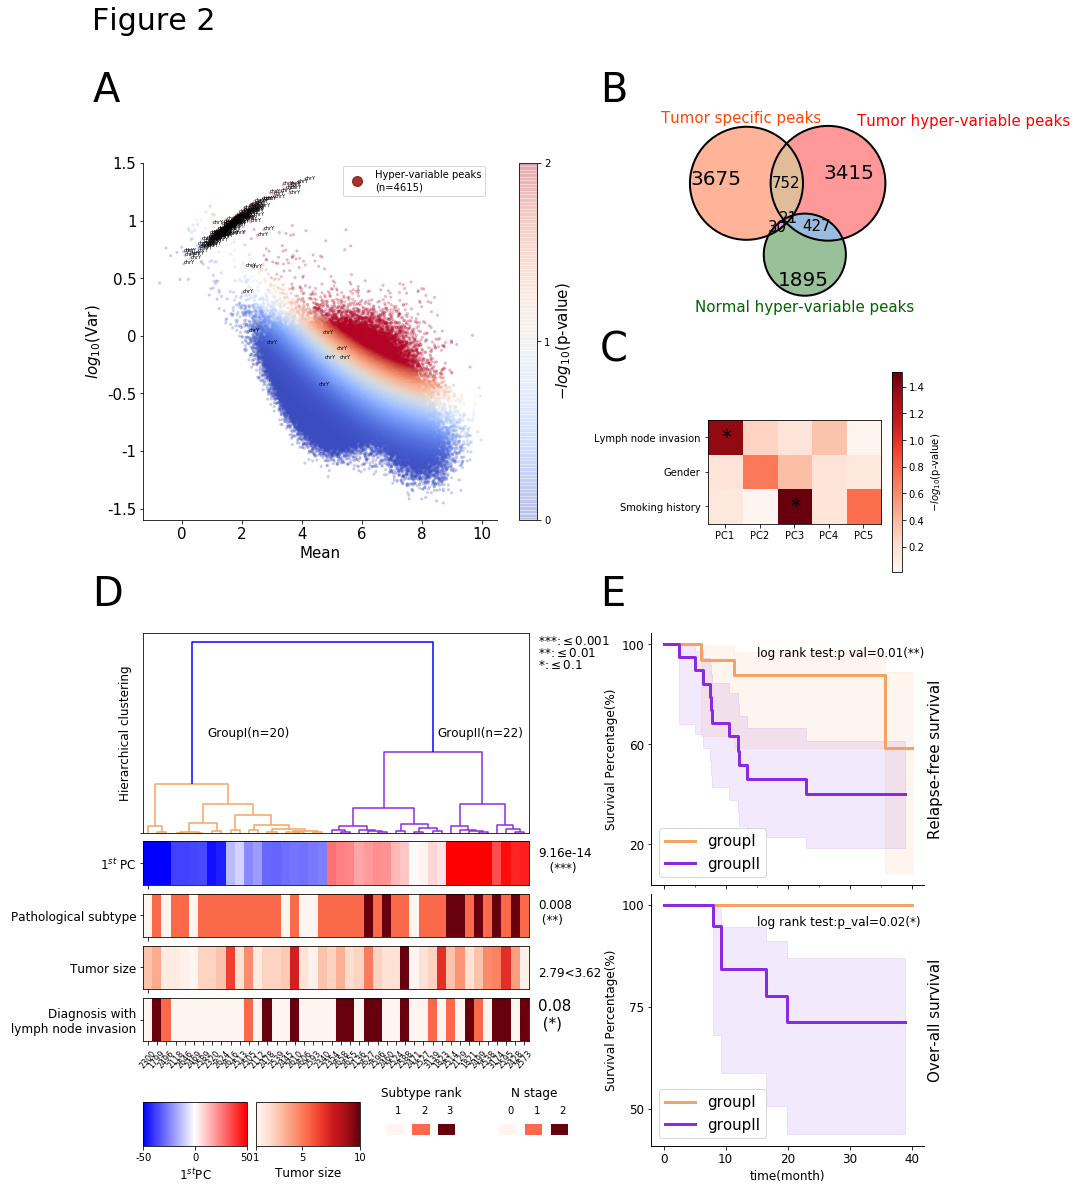

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import *
import matplotlib.patches as patches
from matplotlib import colors
import math
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.cm as cm
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

scipy.cluster.hierarchy.set_link_color_palette(['sandybrown','blueviolet'])


fig=plt.figure(figsize=(15,20))
#-----------------------------
fig.text(0.13,0.85,'A',size=40)
fig.text(0.6,0.85,'B',size=40)
fig.text(0.6,0.67,'C',size=40)
fig.text(0.13,0.5,'D',size=40)
fig.text(0.6,0.5,'E',size=40)



fig.text(0.13,0.9,'Figure 2',size=30)


#-----------------------------
gs=mpl.gridspec.GridSpec(21,15)

#======================================================
#Fig.2A
#======================================================
ax=plt.subplot(gs[2:9,1:9])

n=single_end_p_value[(single_end_p_value['fold.change']>1)&
                     (single_end_p_value['y']<=0.01)&
                     (single_end_p_value['chrom']!='chrY')&
                     (single_end_p_value['chrom']!='chrX')].shape[0]

t=-np.log10(single_end_p_value['y'])
plt.scatter(single_end_p_value['observed.mean'],np.log10(single_end_p_value['observed.var']),
            c=t,cmap='coolwarm',
            alpha=0.2,s=5,
            vmin=0,vmax=2)

for i in single_end_p_value[single_end_p_value['chrom']=='chrY'].index:
    x=single_end_p_value.loc[i,'observed.mean']
    y=np.log10(single_end_p_value.loc[i,'observed.var'])
    plt.text(x,y,'chrY',color='black',size=5)

legends=[plt.plot([],[],marker='o',label='Hyper-variable peaks\n(n=%d)'%(n),
                  ms=10, ls="", mec=None,color='darkred',alpha=0.8)[0]]
plt.legend(loc='center left',bbox_to_anchor=(0.55,0.95),handles=legends,frameon=True)

plt.xticks([0,2,4,6,8,10],[0,2,4,6,8,10],size=15)
plt.yticks([-1.5,-1,-0.5,0,0.5,1,1.5],[-1.5,-1,-0.5,0,0.5,1,1.5],size=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Mean',size=15)
plt.ylabel('$log_{10}$(Var)',size=15)
cbar=plt.colorbar()
cbar.ax.set_ylabel('$-log_{10}$(p-value)',size=15)
cbar.set_ticks([0.0,1.0,2.0])
#======================================================
#Fig.2B
#======================================================

ax=plt.subplot(gs[1:5,10:15])

sets=[set(tumor_specific_bins),set(tumor_hyper_variable_bins),set(normal_hyper_variable_bins)]
labs=['Tumor specific peaks','Tumor hyper-variable peaks','Normal hyper-variable peaks']
v=venn3(sets,labs)
c=venn3_circles(subsets={'100':3675,'110':752,'010':3415,'110':773,'111':21,'101':30,'011':427,'001':1895},color='black')
v.get_patch_by_id('100').set_color('orangered')
v.get_label_by_id('100').set_fontsize(20)
v.get_label_by_id('011').set_fontsize(15)
v.get_patch_by_id('010').set_color('red')
v.get_label_by_id('010').set_fontsize(20)
v.get_label_by_id('110').set_fontsize(15)
v.get_patch_by_id('001').set_color('darkgreen')
v.get_label_by_id('001').set_fontsize(20)
v.get_label_by_id('111').set_fontsize(15)
v.get_label_by_id('101').set_fontsize(15)

v.set_labels[0].set_fontsize(15)
v.set_labels[0].set_color('orangered')
v.set_labels[1].set_fontsize(15)
v.set_labels[1].set_color('red')
v.set_labels[2].set_fontsize(15)
v.set_labels[2].set_color('darkgreen')

v.set_labels[0].set_x(0.2)
v.set_labels[0].set_y(0.5)

#======================================================
#Fig.2C
#======================================================

ax=plt.subplot(gs[6:10,11:15])

df=pd.read_csv('../correlating_PC_with_clinical_infos.txt',sep='\t')

plt.imshow(-np.log10(df.values),cmap='Reds')
plt.yticks([0,1,2],df.index,size=10)
plt.xticks([0,1,2,3,4],df.columns)
plt.text(-0.1,0.15,'*',size=20)
plt.text(1.9,2.15,'*',size=20)
cb=plt.colorbar()
cb.set_label('$-log_{10}$(p-value)')

#======================================================
#Fig.2D
#======================================================

ax=plt.subplot(gs[11:13,8:9])

plt.text(0,3,'***:$\leq$0.001',size=12)
plt.text(0,2,'**:$\leq$0.01',size=12)
plt.text(0,1,'*:$\leq$0.1',size=12)
plt.ylim(-4,4)
plt.axis('off')

ax=plt.subplot(gs[11:15,1:8])


Z=linkage(np.array([list(samples_infos['First PC'].values)]).T,method='ward',metric='euclidean')
D=dendrogram(Z)

plt.text(70,150,'GroupI(n=20)',size=12)
plt.text(320,150,'GroupII(n=22)',size=12)

plt.ylabel('Hierarchical clustering',size=12)
plt.xticks([0],[''])
plt.yticks([0],[''])

ax=plt.subplot(gs[15:16,1:8])

plt.imshow(np.array([samples_infos['First PC']]),cmap='bwr',interpolation='nearest',aspect='auto',
           vmin=-50,vmax=50)
plt.xticks([0],[''])
plt.yticks([0],['$1^{st}$ PC'],size=12)

ax=plt.subplot(gs[15:16,8:9])

plt.text(0,1.3,'9.16e-14\n   (***)',size=12)
plt.xlim(0,0.3)
plt.ylim(1,2)
plt.axis('off')

ax=plt.subplot(gs[16:17,1:8])

alpha_dic={'A':2,'S':3,'IMA':2,'MIA':1,'L':1,'P':2,'M':3}
alpha_dic={0.05:1,0.1:1,0.55:2,1:3}

pathological_subtypes=[]
for i in samples_infos['Pathological subtype']:
    pathological_subtypes.append(alpha_dic[i])
plt.imshow(np.array([pathological_subtypes]),cmap='Reds',interpolation='nearest',aspect='auto',
           vmin=1,vmax=3)   
plt.xticks([0],[''])
plt.yticks([0],['Pathological subtype'],size=12)

ax=plt.subplot(gs[16:17,8:9])

plt.text(0,1.3,'0.008\n (**)',size=12)
plt.xlim(0,0.3)
plt.ylim(1,2)
plt.axis('off')

ax=plt.subplot(gs[17:18,1:8])

plt.imshow(np.array([samples_infos['Tumor size']]),cmap='Reds',interpolation='nearest',aspect='auto',
           vmin=1,vmax=10)
plt.xticks([0],[''])
plt.yticks([0],['Tumor size'],size=12)

ax=plt.subplot(gs[17:18,8:9])

plt.text(0,1.3,'2.79<3.62',size=12)
plt.xlim(0,0.3)
plt.ylim(1,2)
plt.axis('off')

ax=plt.subplot(gs[18:19,1:8])

plt.imshow(np.array([samples_infos['Diagnosis with lymph node invasion']]),cmap='Reds',interpolation='nearest',aspect='auto')
plt.xticks([i for i in range(42)],samples_infos['ID'],rotation=50,size=8)
plt.yticks([0],['Diagnosis with\n lymph node invasion'],size=12)

ax=plt.subplot(gs[18:19,8:9])

plt.text(0,1.3,'0.08\n (*)',size=15)
plt.xlim(0,0.3)
plt.ylim(1,2)
plt.axis('off')

ax=plt.subplot(gs[20:21,1:3])
norm=mpl.colors.Normalize(vmin=-50,vmax=50)
cb1=mpl.colorbar.ColorbarBase(ax,cmap='bwr',norm=norm,ticks=[-50,0,50],orientation='horizontal')
cb1.set_label('$1^{st}$PC',size=12)
cb1.ax.set_xticklabels(['-50','0','50'],rotation=0,size=10)

ax=plt.subplot(gs[20:21,3:5])

norm=mpl.colors.Normalize(vmin=1,vmax=10)
cb1=mpl.colorbar.ColorbarBase(ax,cmap='Reds',norm=norm,ticks=[1,5,10],orientation='horizontal')
cb1.set_label('Tumor size',size=12)
cb1.ax.set_xticklabels(['1','5','10'],rotation=0,size=10)

ax=plt.subplot(gs[20:21,5:7])
patches=[]
for x,y in zip([0,0.15,0.3],[1,2,3]):
    rect=mpatches.Rectangle([x,0],0.1,0.1,ec="black")
    patches.append(rect)
    plt.text(x+0.1/2,0.2,y,size=10)

colors=[1,2,3]
collection=PatchCollection(patches,cmap=plt.cm.Reds)
collection.set_array(np.array(colors))
ax.add_collection(collection)

plt.xlim(-0.1,0.5)
plt.ylim(-0.1,0.3)

plt.title('Subtype rank',size=12)
plt.axis('off')

ax=plt.subplot(gs[20:21,7:9])

patches=[]
for x,y in zip([0,0.15,0.3],[0,1,2]):
    rect=mpatches.Rectangle([x,0],0.1,0.1,ec="black")
    patches.append(rect)
    plt.text(x+0.1/2,0.2,y,size=10)

colors=[1,2,3]
collection=PatchCollection(patches,cmap=plt.cm.Reds)
collection.set_array(np.array(colors))
ax.add_collection(collection)

plt.xlim(-0.1,0.5)
plt.ylim(-0.1,0.3)
plt.title('N stage',size=12)
plt.axis('off')

#======================================================
#Fig.2E
#======================================================
ax=plt.subplot(gs[11:16,10:15])

groupI_time=data.loc[list(classification_result[classification_result['group_ID']=='GroupI']['patient_ID'].values),:]
temp=groupI_time.dropna(axis=0,how='any')
gIr=temp[temp['RFS']!=' ']
gIT=[float(i) for i in gIr['RFS'].values]
gIE=gIr['RFS-E'].values

groupII_time=data.loc[list(classification_result[classification_result['group_ID']=='GroupII']['patient_ID'].values),:]
temp=groupII_time.dropna(axis=0,how='any')
gIIr=temp[temp['RFS']!=' ']
gIIT=[float(i) for i in gIIr['RFS'].values]
gIIE=gIIr['RFS-E'].values

kmf=KaplanMeierFitter()
kmf.fit(gIT,gIE,label='groupI')
ax=kmf.plot(ax=ax,ci_alpha=0.1,c='sandybrown',linewidth=3)
kmf.fit(gIIT,gIIE,label='groupII')
kmf.plot(ax=ax,ci_alpha=0.1,c='blueviolet',linewidth=3)
plt.xlabel('',size=15)
plt.title('',size=15)
plt.legend(fontsize=15)
plt.text(15,0.95,'log rank test:p val=0.01(**)',size=12)

results=logrank_test(gIT,gIIT,gIE,gIIE,alpha=.95)

results.print_summary()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('Survival Percentage(%)',size=12)
plt.yticks([0.2,0.6,1.0],[20,60,100],size=12)
plt.xticks([0,10,20,30,40],[0,10,20,30,40],size=12)

#plt.xticks([0,10,20,30,40],['','','','',''],size=12)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2=ax.twinx()
ax2.set_ylabel('Relapse-free survival',size=15)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.yticks([],[])




#--------------------------------------------------------------#

ax=plt.subplot(gs[16:21,10:15])

groupI_time=data.loc[list(classification_result[classification_result['group_ID']=='GroupI']['patient_ID'].values),:]
temp=groupI_time.dropna(axis=0,how='any')
gIr=temp[temp['OS']!=' ']
gIT=[float(i) for i in gIr['OS'].values]
gIE=gIr['OS-E'].values

groupII_time=data.loc[list(classification_result[classification_result['group_ID']=='GroupII']['patient_ID'].values),:]
temp=groupII_time.dropna(axis=0,how='any')
gIIr=temp[temp['OS']!=' ']
gIIT=[float(i) for i in gIIr['OS'].values]
gIIE=gIIr['OS-E'].values

results=logrank_test(gIT,gIIT,gIE,gIIE,alpha=.95)

results.print_summary()


kmf = KaplanMeierFitter()
kmf.fit(gIT,gIE,label='groupI')
ax=kmf.plot(ax=ax,ci_alpha=0.1,c='sandybrown',linewidth=3)
kmf.fit(gIIT,gIIE,label='groupII')
kmf.plot(ax=ax,ci_alpha=0.1,c='blueviolet',linewidth=3)
plt.ylabel('Survival Percentage(%)',size=12)
plt.xlabel('time(month)',size=12)
plt.legend(fontsize=15)
plt.text(15,0.95,'log rank test:p_val=0.02(*)',size=12)
plt.xticks([0,10,20,30,40],[0,10,20,30,40],size=12)
plt.yticks([0.5,0.75,1.0],[50,75,100],size=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2=ax.twinx()
ax2.set_ylabel('Over-all survival',size=15)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.yticks([],[])

plt.savefig('../Figure2.pdf',bbox_inches='tight')


plt.show()

In [4]:
import scipy.stats

scipy.stats.fisher_exact([[10,8],
                          [7,12]])

(2.142857142857143, 0.3299802707937361)